In [1]:
!pip install matplotlib
!pip install tensorflow_datasets
!pip install tensorflow

import numpy as np

# Intro to Neural Networks

Learning objectives:
1. Understand what neural networks can do.
2. Understand the structure of a neural network.
3. Understand forward propagation and backpropagation.
4. Understand the structure of a neuron, and be able to select appropriate activation functions.
5. Implement a neural network in keras

Prerequisites:
1. derivatives, including partial derivatives
2. gradient descent
3. chain rule

Some very good videos from 3 blue 1 brown:
- [Neural Network playlist (4 videos)](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)


# 1. Applications of Neural Networks


### Text Generation
The [GPT-2](http://jalammar.github.io/illustrated-gpt2/) model is a **decoder** model which uses previous words to predict the next one in a sequence. You can experiment with a limited version of this model at [talk to transformer](https://talktotransformer.com/). 

**Input:** In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English.

**Output:** The amazing find was made by researchers of the Universidad Austral de Chile, thanks to one of the country's most highly active amateur scientists. Of course, the creature in question was not a real unicorn, but a llama, and unfortunately the strange creature was killed before researchers could analyze its vocalization.


### Image Classification
The [VGG-16](https://neurohive.io/en/popular-networks/vgg16/) model is a **deep convolutional** network that can classify image regardless of the scale or rotation of the objects in the image.

doge? | doge?
- | - 
[<img src="img/shibe.jpg" width=240 />](https://knowyourmeme.com/memes/doge) |[<img src="img/doge.jpg" width=240 />](https://en.wikipedia.org/wiki/Doge_of_Venice)


### Image Generation
[Generative adversarial networks](https://neurohive.io/en/news/deepfake-videos-gan-sythesizes-a-video-from-a-single-photo/]) can be used to create plausible images and video.
<img src="img/gan.png" width=600 />

### AI
AlphaZero is a neural network AI that has beaten world champions in [Chess](https://www.chess.com/news/view/updated-alphazero-crushes-stockfish-in-new-1-000-game-match), [Go](https://www.theverge.com/2019/11/27/20985260/ai-go-alphago-lee-se-dol-retired-deepmind-defeat), and [Starcraft](https://www.theverge.com/2019/10/30/20939147/deepmind-google-alphastar-starcraft-2-research-grandmaster-level)

[OpenAI](https://openai.com/blog/solving-rubiks-cube/) has also applied neural networks to solving physical robotics problems.

<img src="img/rubiks.jpg" width=600 />

### Other applications

Many machine learning techniques can also be implemented through neural networks (linear regression, logistic regression, etc.)

# 2. Structure of a Neural Network

Black Box view:
<img src="img/black_box.png" width=600 />
Layer view:
<img src="img/layers.png" width=600 />

Neuron view:
<img src="img/layers_with_neurons.png" width=600 />

As functions:
$$\mathbf{y} = \mathbf{f}_y(\mathbf{W}_4, \mathbf{b}_4, \mathbf{h}_3)$$
$$\mathbf{h}_3 = \mathbf{f}_{h(3)}(\mathbf{W}_3, \mathbf{b}_3, \mathbf{h}_2)$$
$$\mathbf{h}_2 = \mathbf{f}_{h(2)}(\mathbf{W}_2, \mathbf{b}_2, \mathbf{h}_1)$$
$$\mathbf{h}_1 = \mathbf{f}_{h(1)}(\mathbf{W}_1, \mathbf{b}_1, \mathbf{x})$$


# 3. Forward propagation and backpropagation

## Forward propagation: 
1. Calculate first hidden layer from inputs
2. Calculate second hidden layer from first hidden layer
3. etc.
4. Calculate outputs from last hidden layer


In terms of the functions above,
1. $$\mathbf{h}_1 = \mathbf{f}_{h(1)}(\mathbf{W}_1, \mathbf{b}_1, \mathbf{x})$$
2. $$\mathbf{h}_2 = \mathbf{f}_{h(2)}(\mathbf{W}_2, \mathbf{b}_2, \mathbf{h}_1)$$
3. $$\mathbf{h}_3 = \mathbf{f}_{h(3)}(\mathbf{W}_3, \mathbf{b}_3, \mathbf{h}_2)$$
4. $$\mathbf{y} = \mathbf{f}_y(\mathbf{W}_4, \mathbf{b}_4, \mathbf{h}_3)$$


And we can calculate the value of a cost function:
$$C(\mathbf{y}, \mathbf{y}_{obs})$$

## Backpropagation 
Backpropagation is how we find the gradient across all weights so that we can do gradient descent. 

Review:
- Chain Rule

$$ z =  f(g(x)) $$
$$ u = g(x) $$
$$ \frac{dz}{dx} =  \frac{dz}{du} \frac{du}{dx}$$

For example:
$$ \frac{dC}{dW_3} = \frac{dC}{d\mathbf{y}}\frac{d\mathbf{y}}{d\mathbf{h}_3}\frac{d\mathbf{h}_3}{d\mathbf{W}_3} $$

In general:
$$ 
\frac{dC}{dW_i} = 
    \frac{dC}{d\mathbf{y}}
    \frac{d\mathbf{y}}{d\mathbf{h}_m}
    \frac{d\mathbf{h}_m}{d\mathbf{h}_{m-1}} ... 
    \frac{d\mathbf{h}_{i+1}}{d\mathbf{h}_{i}}
    \frac{d\mathbf{h}_{i}}{d\mathbf{W}_{i}}
$$

Or more compactly, 
$$   \frac{dC}{\mathbf{dW}_i} = \frac{dC}{\mathbf{dh}_{i}}\frac{\mathbf{dh}_{i}}{\mathbf{dW}_i}$$


# 4. Building a simple artificial neuron


[<img src="img/neuron.jpg" width=400 />](https://medium.com/@jayeshbahire/the-artificial-neural-networks-handbook-part-4-d2087d1f583e)


We will use the Rectified Linear Unit or [ReLU](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) as our activation function: 

$$ z = w_1x_1 + w_2x_2 + ... + w_mx_m + b$$
$$    ReLU(z) = \Bigg\{
        \begin{array}{ll}
        z, & \text{if } z > 0\\
        0, & \text{otherwise }\\
        \end{array}
$$

In [2]:
from scripts import demo

inputs = demo.make_inputs(5)
weights, bias = demo.initialize_neuron(5)

In [3]:
# Write this together
def neuron_weighted_sum(prev_layer, weights, bias):
    '''
    Params
    ———-
    prev_layer: numpy.ndarray
        Should have shape (m, ). Contains output values from the previous layer.
    weights: numpy.ndarray 
        Should have shape (m, ). Contains weights connecting previous layer to this neuron
    bias: float
    
    Returns
    ———-
    output: float
        the output of the neuron

    '''
    weighted_sum = bias
    for i in range(len(prev_layer)):
        weighted_sum += prev_layer[i] * weights[i]
        
    return weighted_sum

In [4]:
def relu(z):
    '''
    Params
    ———-
    z: float
    
    Returns
    ———-
    output: float
    '''
    output = np.max([z, 0])
    
    return output

In [5]:
def neuron(prev_layer, weights, bias, activation_function):
    '''
    Params
    ———-
    weighted_sum: float
        otuput from neuron_weighted_sum function
    activation_function: function(float)
    
    Returns
    ———-
    output: float
        the output of the neuron

    '''
    
    weighted_sum = neuron_weighted_sum(prev_layer, weights, bias)
    neuron_output = activation_function(weighted_sum)
    
    return(neuron_output)

For backpropagation, we'll also need a way to get derivatives across a neuron. 

$$ z = w_1x_1 + w_2x_2 + ... + w_mx_m + b$$
$$ ReLU(z) = \Bigg\{
        \begin{array}{ll}
        z, & \text{if } z > 0\\
        0, & \text{otherwise }\\
        \end{array} $$

In [14]:
def d_relu_d_sum(z):
    '''
    Find the derivative of the relu(z) with respect to z
    
    Params
    ———-
    x: float
    
    Returns
    ———-
    output: float
    '''

    if z > 0:
        output = 1
    else :
        output = 0
    
    return output
        

In [15]:
def d_sum_d_weights(prev_layer, weights, bias):
    '''
    Find the derivative of a neuron with respect to weights
        
    Params
    ———-
    prev_layer: numpy.ndarray
        Should have shape (m, ). Contains output values from the previous layer.
    weights: numpy.ndarray 
        Should have shape (m, ). Contains weights connecting previous layer to this neuron
    bias: float
        
    Returns
    ———-
    output: d_sum_d_weights: numpy.ndarray
        derivative of the neuron with respect to weights
    '''
    dz_dW = prev_layer
    
    return dz_dW

In [20]:
def d_neuron_d_weights(dz_dW, z, d_activation_d_sum):
    '''
    Find the derivative of a neuron with respect to the previous layer, 
        with respect to weights, and with respect to bias.
        
    Params
    ———-
    dz_dW: numpy.ndarray
        Should have shape (m, ). Contains output values from d_sum_d_weights.
    z: numpy.ndarray 
        float. Output from neuron_weighted_sum function.
    d_activation_d_sum: function
        the derivative of the activation function

        
    Returns
    ———-
    output: d_neuron_d_weights: numpy.ndarray
        derivative of the neuron with respect to weights
    '''
    d_neuron_d_weights = dz_dW * d_activation_d_sum(z)
    
    return d_neuron_d_weights

In [31]:
# Test the neuron function. (inputs, weights, bias are imported from the demo script)
inputs = demo.make_inputs(5)
weights, bias = demo.initialize_neuron(5)
weighted_sum = neuron_weighted_sum(inputs, weights, bias)
neuron_output = neuron(inputs, weights, bias, relu)

print("inputs: {}".format(inputs))
print("weights: {}".format(weights))
print("bias: {}".format(bias))
print("")
print("weighted_sum: {}".format(weighted_sum))
print("output: {}".format(neuron_output))


dz_dw = d_sum_d_weights(inputs, weighted_sum, d_relu_dz)
d_neuron_dw = d_neuron_d_weights(dz_dw, weighted_sum, d_relu_dz)
print("")
print("d_neuron/d_weights: {}".format(d_neuron_dw))



inputs: [-0.31102169  0.50223747  0.58287405 -0.92423318  0.58855652]
weights: [-0.55708388 -0.76947242  0.39692106  0.81044574 -0.63964117]
bias: 0.6493918636869251

weighted_sum: -0.4579516825996736
output: 0.0

d_neuron/d_weights: [-0.  0.  0. -0.  0.]


# 5. Recognizing Handwritten Digits

Just use Keras!

Example from https://www.tensorflow.org/datasets/keras_example

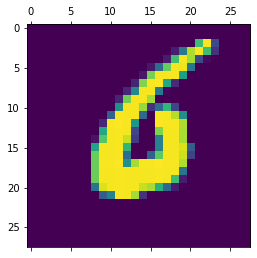

In [34]:
from matplotlib import pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

train, test = demo.mnist_data()

plt.matshow(next(tfds.as_numpy(train))[0][0][:,:,0])

In [36]:
model = tf.keras.Sequential()
model.add(layers.Flatten())
# hidden layers
model.add(layers.Dense(50, activation = 'relu'))
model.add(layers.Dense(50, activation = 'relu'))

# output layer
model.add(layers.Dense(10, activation = 'softmax'))


model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

model.fit(
    train,
    epochs=6,
    validation_data=test,
)

Epoch 1/6
469/469 [==============================] - 1s 3ms/step - loss: 0.4140 - accuracy: 0.8836 - val_loss: 0.2146 - val_accuracy: 0.9393
Epoch 2/6
469/469 [==============================] - 1s 2ms/step - loss: 0.1876 - accuracy: 0.9456 - val_loss: 0.1576 - val_accuracy: 0.9528
Epoch 3/6
469/469 [==============================] - 1s 2ms/step - loss: 0.1426 - accuracy: 0.9582 - val_loss: 0.1351 - val_accuracy: 0.9589
Epoch 4/6
469/469 [==============================] - 1s 2ms/step - loss: 0.1128 - accuracy: 0.9662 - val_loss: 0.1137 - val_accuracy: 0.9647
Epoch 5/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0957 - accuracy: 0.9708 - val_loss: 0.1073 - val_accuracy: 0.9682
Epoch 6/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0813 - accuracy: 0.9752 - val_loss: 0.1031 - val_accuracy: 0.9693


Network thinks this image is a 8


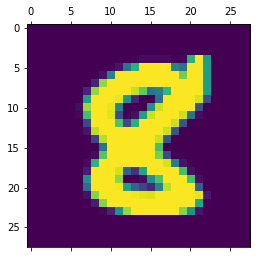

In [33]:
#Examine predictions
batch_index = 32

example = next(tfds.as_numpy(test))[0]
print("Network thinks this image is a {}".format(np.argmax(model.predict(example)[batch_index])))
plt.matshow(example[batch_index,:,:,0])

# What else would we do in a full day lesson?

- Implement the training of a neural network using numpy.
- Go over all commonly used activation functions and discuss the pros/cons of each. 
- Understand what vanishing gradient means, and how that applies to choice of activation function
- Go over commonly used cost functions
- Learn how GPUs can be used to accelerate the training of neural nets.
- Overview of convolutional layers, GRUs and LSTMs. 